# Réaliser une CAH avec Python
On reprend les données du cours de statistiques avec R et on essaie d'obtenir les mêmes résultats

In [3]:
import pandas

data = pandas.read_csv(".\\DONNEES\\Data_INSEE_2015.txt", sep=";", decimal=".", encoding="utf-8",
                      dtype={"Dep":str, "NivVie":int, "MedSpe":int})
data.head()

,Dep,Lat,NivVie,TXCh,MedSpe,Esp
0,Ain,46.125753,16398,6.9,83,82.95
1,Aisne,49.492610,14377,13.7,113,79.85
2,Allier,46.377648,14661,10.4,136,81.30
3,Alpes-de-Haute-Provence,44.109789,14958,11.5,120,82.10
4,Hautes-Alpes,44.655045,15173,9.0,183,82.70


In [9]:
data.set_index(keys="Dep", inplace=True)
data.head()

,Lat,NivVie,TXCh,MedSpe,Esp
Dep,,,,,
Ain,46.125753,16398,6.9,83,82.95
Aisne,49.492610,14377,13.7,113,79.85
Allier,46.377648,14661,10.4,136,81.30
Alpes-de-Haute-Provence,44.109789,14958,11.5,120,82.10
Hautes-Alpes,44.655045,15173,9.0,183,82.70


In [12]:
import scipy 

## on commence par créer une matrice de distance euclidienne :
cah = scipy.cluster.hierarchy.linkage(data, method="ward", metric="euclidean")
cah

array([[4.80000000e+01, 7.90000000e+01, 9.66966595e+00, 2.00000000e+00],
       [5.80000000e+01, 8.80000000e+01, 1.16854099e+01, 2.00000000e+00],
       [8.00000000e+00, 8.20000000e+01, 1.31312842e+01, 2.00000000e+00],
       [1.10000000e+01, 6.10000000e+01, 1.49592718e+01, 2.00000000e+00],
       [3.20000000e+01, 5.00000000e+01, 1.58337702e+01, 2.00000000e+00],
       [1.60000000e+01, 7.10000000e+01, 1.62351649e+01, 2.00000000e+00],
       [3.90000000e+01, 8.90000000e+01, 1.63289830e+01, 2.00000000e+00],
       [1.50000000e+01, 4.60000000e+01, 1.68268949e+01, 2.00000000e+00],
       [2.80000000e+01, 2.90000000e+01, 2.00681960e+01, 2.00000000e+00],
       [5.60000000e+01, 5.70000000e+01, 2.04877426e+01, 2.00000000e+00],
       [9.00000000e+00, 1.80000000e+01, 2.05108737e+01, 2.00000000e+00],
       [3.60000000e+01, 5.50000000e+01, 2.16602154e+01, 2.00000000e+00],
       [4.20000000e+01, 4.90000000e+01, 2.25736852e+01, 2.00000000e+00],
       [2.30000000e+01, 4.40000000e+01, 2.41812465e

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [40.0, 40.0, 72.5, 72.5],
  [10.0, 10.0, 56.25, 56.25],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [102.5, 102.5, 134.375, 134.375],
  [33.125, 33.125, 118.4375, 118.4375],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [215.0, 215.0, 233.75, 233.75],
  [183.75, 183.75, 224.375, 224.375],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [310.0, 310.0, 340.0, 340.0],
  [272.5, 

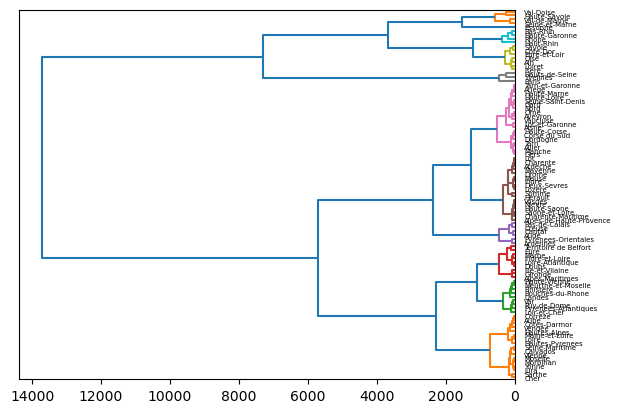

In [16]:
scipy.cluster.hierarchy.dendrogram(cah, labels = data.index, orientation = "left", color_threshold = 1000)

In [17]:
## Ensuite, afficher les groupes pour chaque individus :
groupes_cah = scipy.cluster.hierarchy.fcluster(cah, t = 1000, criterion = "distance")
print(groupes_cah)

[ 8  6  6  5  1  3  5  4  6  1  4  6  2  1  4  5  5  1  1  8  1  4  6  3
  5  3  8  2  6  6  6  9  6  3  5  3  5  3  8  1  2  2  1  6  3  8  5  6
  5  1  6  3  6  5  2  5  1  1  5  6  8  6  4  2  2  1  4  9  9  9  5  5
  1  8 10  7  1 10  7  5  5  6  6  2  6  1  1  2  5  1  3 11  7  6 10 10]


In [31]:
## afficher graphiquement :
import numpy 

temp = numpy.unique(groupes_cah)

classifications = pandas.DataFrame(data={"class":temp, "count":0})
classifications

,class,count
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [36]:
for i, r in classifications.iterrows() :
    for j in groupes_cah :
        if classifications.loc[i, "class"] == j :
            classifications.loc[i, "count"] = classifications.loc[i, "count"] + 1

classifications.head()

,class,count
0,1,18
1,2,10
2,3,10
3,4,7
4,5,18


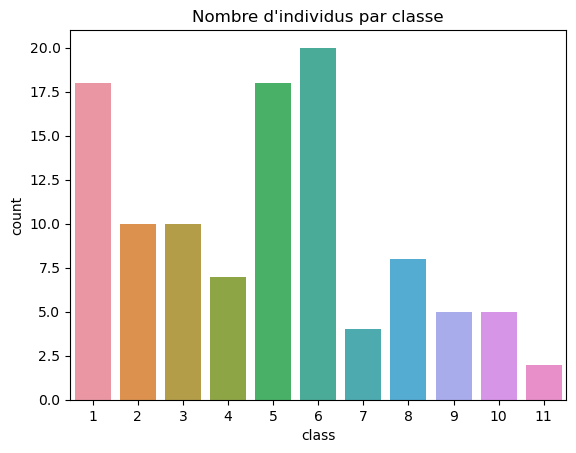

In [41]:
import seaborn
import matplotlib.pyplot as plt 

seaborn.barplot(x=classifications["class"], y=classifications["count"])
plt.title("Nombre d'individus par classe")
plt.show()

In [51]:
## puis afficher les caractéristiques moyens des clusteurs :
labels = scipy.cluster.hierarchy.fcluster(cah, 3.5, criterion="distance")

data["clusters"] = groupes_cah

summary = data.groupby('clusters').mean()
summary

,Lat,NivVie,TXCh,MedSpe,Esp
clusters,,,,,
1,47.232358,15207.588235,9.452941,140.705882,81.761765
2,45.606410,15571.555556,9.544444,185.888889,81.983333
3,47.125557,15931.111111,9.522222,186.555556,81.983333
4,46.163257,13929.500000,11.533333,121.333333,81.008333
5,46.369738,14826.647059,9.847059,122.294118,81.611765
6,45.644005,14528.894737,10.500000,129.105263,81.760526
7,48.837737,20202.333333,7.600000,327.000000,83.816667
8,47.159448,16321.571429,8.528571,141.428571,82.321429
9,46.425675,16852.500000,9.350000,224.000000,82.637500
